## Data visualization and analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Sampling, bias, and summary statistics

Population - entire dataset
Sample - representative subset of the population
Basic statistics
 - typical values of the dataset: mean, median, mode
 - spread of the dataset: variance, standard deviation

Mode of random sample: ModeResult(mode=77.58982319008614, count=3)
Mode of biased sample: ModeResult(mode=31.47810444771605, count=1)


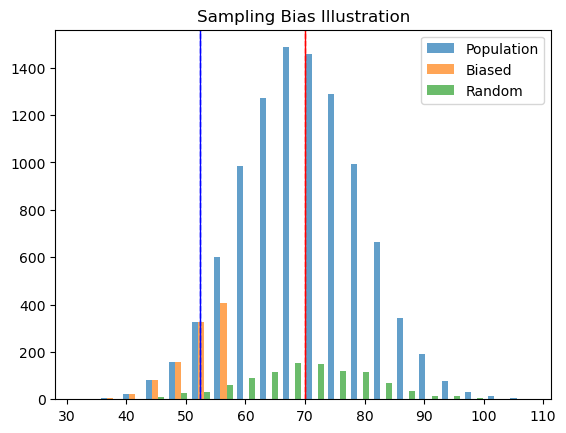

In [101]:
# Create population data
population = np.random.normal(70, 10, 10000)

# Sampling (biased sample vs. random sample)
biased_sample = sorted(population)[:1000]
random_sample = np.random.choice(population, 1000)

# Visualize the distributions
plt.hist([population, biased_sample, random_sample], label=['Population', 'Biased', 'Random'], bins=20, alpha=0.7)
plt.legend(); plt.title("Sampling Bias Illustration")
plt.axvline(np.mean(biased_sample), color='blue', linewidth=1)
plt.axvline(np.mean(biased_sample), color='blue', linestyle='dashed', linewidth=1)

plt.axvline(np.mean(random_sample), color='red', linewidth=1)
plt.axvline(np.mean(random_sample), color='red', linestyle='dashed', linewidth=1)

from scipy import stats
print('Mode of random sample:', stats.mode(random_sample))
print('Mode of biased sample:', stats.mode(biased_sample))

Text(0.5, 1.0, 'Sampling Bias Illustration')

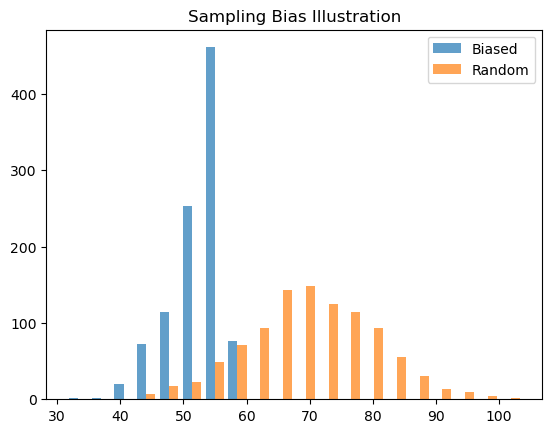

In [102]:
# Visualize the distributions
plt.hist([biased_sample, random_sample], label=['Biased', 'Random'], bins=20, alpha=0.7)
plt.legend(); plt.title("Sampling Bias Illustration")

## Why visualization matters

In this example, we will see randomly made dataset that show the same statistic values but different data behavior.
Using data exploration through visualization, you can avoid potential mistakes

In [ ]:
df_anscombe = pd.read_csv('../data/Anscombe_quartet_data.csv')

df_dataset1 = df_anscombe[['x123', 'y1']].rename(columns={'x123': 'x', 'y1': 'y'})
df_dataset2 = df_anscombe[['x123', 'y2']].rename(columns={'x123': 'x', 'y2': 'y'})
df_dataset3 = df_anscombe[['x123', 'y3']].rename(columns={'x123': 'x', 'y3': 'y'})
df_dataset4 = df_anscombe[['x4', 'y4']].rename(columns={'x4': 'x', 'y4': 'y'})


print(pd.concat([df_dataset1, df_dataset2, df_dataset3, df_dataset4], axis=1))

In [ ]:
print('\nThe sum of x in dataset1 to 4')
for i in [df_dataset1, df_dataset2, df_dataset3, df_dataset4]:
    print(np.sum(i['x'].values))

print('\nThe means of x in dataset1 to 4')
for i in [df_dataset1, df_dataset2, df_dataset3, df_dataset4]:
    print(np.mean(i['x'].values))

print('\nThe standard deviation of x in dataset1 to 4')
for i in [df_dataset1, df_dataset2, df_dataset3, df_dataset4]:
    print(np.std(i['x'].values))

In [ ]:
fig, axs = plt.subplots(2,2, layout='constrained')
axs = axs.flatten() # Make 2D to 1D
for idx, val in enumerate([df_dataset1, df_dataset2, df_dataset3, df_dataset4]):
    axs[idx].scatter(val['x'].values, val['y'].values)
    axs[idx].set_xlabel('x')
    axs[idx].set_ylabel('y')
    axs[idx].set_title(f'Dataset {idx+1}')
    axs[idx].set_xlim(2, 20)
    axs[idx].set_ylim(2, 20)

## Descriptive statistics + outlier effects
- Mean and median upon an outlier
- Visualization using scatter, boxplot and violin plot

Random dataset with an outlier
Mean: 65.8665056787701 Median: 51.938403229270875
Random dataset without an outlier
Median: 50.77292314099377 Median: 52.28516883784975


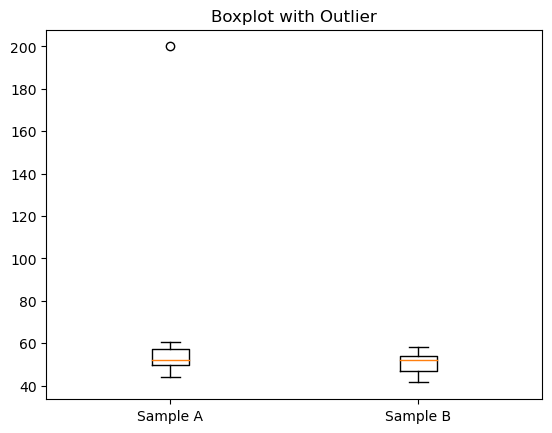

In [ ]:
# Mauual outlier 
sampleA = np.append(np.random.normal(50, 5, 10), [200])
sampleB = np.random.normal(50, 5, 10)

fig, ax = plt.subplots()
ax.boxplot([sampleA, sampleB])
ax.set_xticklabels(['Sample A', 'Sample B'])
ax.set_title("Boxplot with Outlier")

# Mean vs Median 비교
print("Random dataset with an outlier")
print("Mean:", np.mean(sampleA), "Median:", np.median(sampleA))

print("Random dataset without an outlier")
print("Median:", np.mean(sampleB), "Median:", np.median(sampleB))

<Axes: xlabel='sex', ylabel='age'>

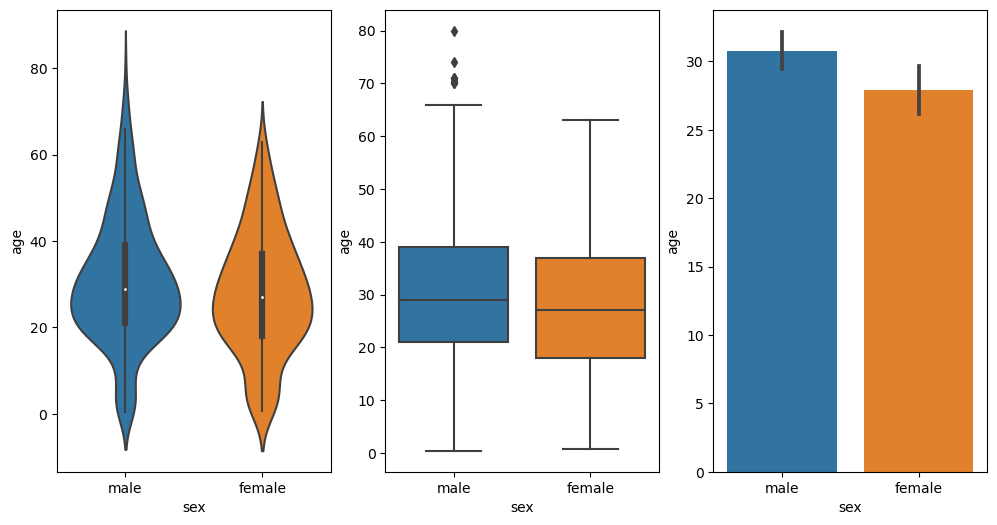

In [122]:
import seaborn as sns
df = sns.load_dataset("titanic")

fix, ax = plt.subplots(1, 3, figsize=(12, 6))
sns.violinplot(x="sex", y="age", data=df, ax=ax[0])
sns.boxplot(x="sex", y="age", data=df, ax=ax[1])
sns.barplot(x="sex", y="age", data=df, ax=ax[2])


In [126]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


c:\Users\kyungho\anaconda3\envs\GENESIS\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


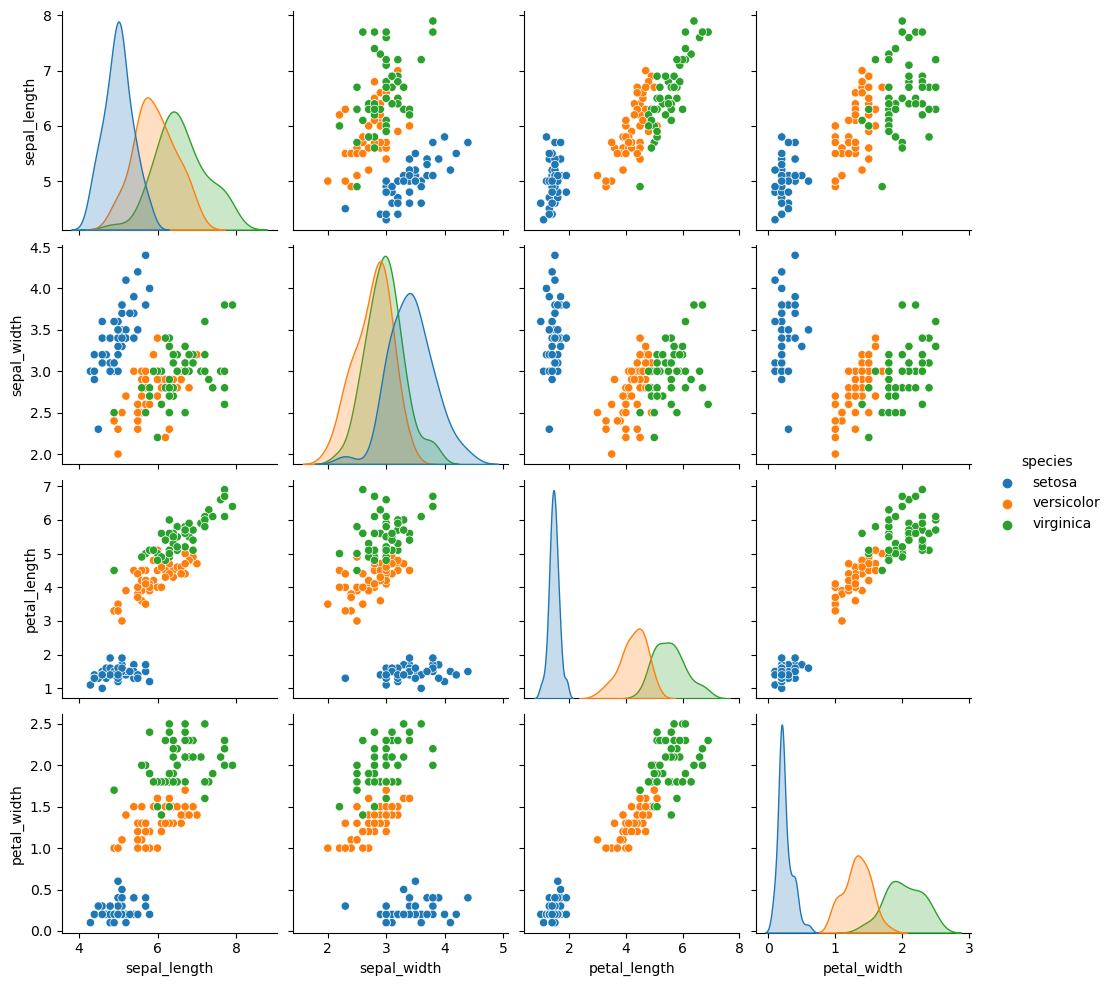

In [128]:
df_iris = sns.load_dataset("iris")
sns.pairplot(df_iris, hue="species")

<Axes: >

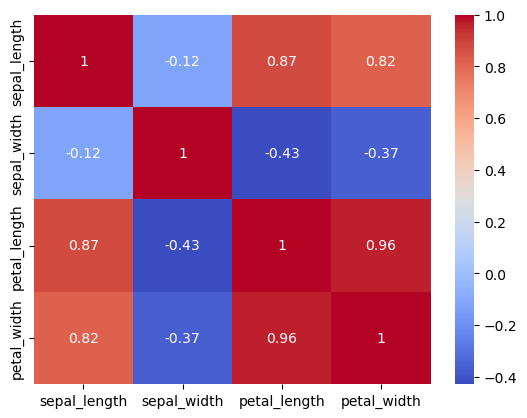

In [129]:
# Heatmap
corr = df_iris.drop('species', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Dimensionality reduction practice
- PCA
- t-SNE

Shape of the original dataset: (1797, 64)


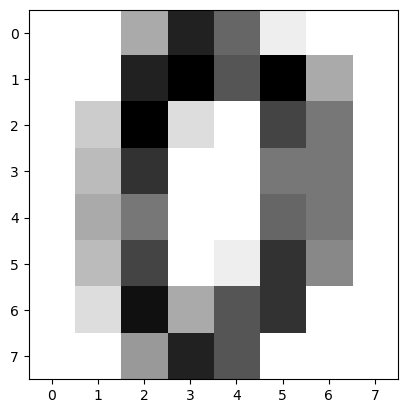

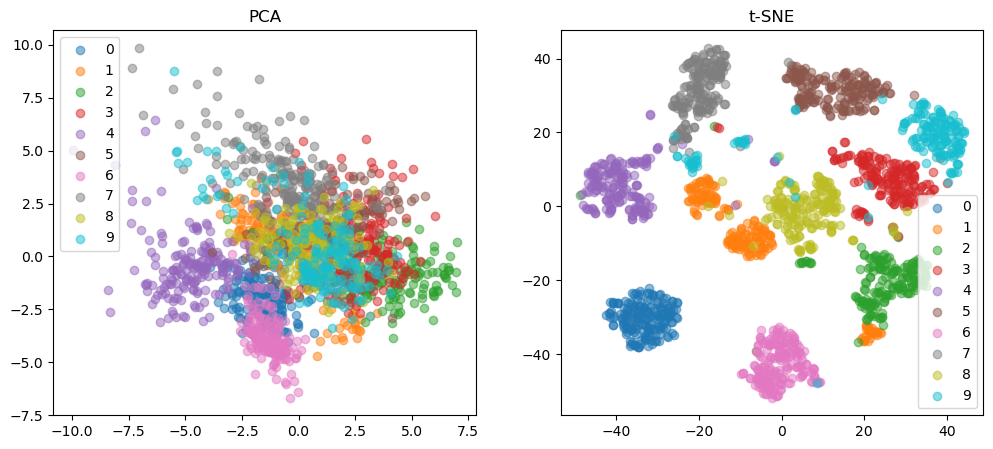

In [133]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

digits = load_digits()
X = digits.data
y = digits.target

print("Shape of the original dataset:", X.shape)
img = X[0].reshape(8, 8)
fig, ax = plt.subplots()
plt.imshow(img, cmap='binary')
plt.show()


# PCA
X_scaled = StandardScaler().fit_transform(X) # standardize the data z = (x - u) / s
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# t-SNE
X_tsne = TSNE(n_components=2).fit_transform(X_scaled)

# 시각화 비교
fig, axs = plt.subplots(1, 2, figsize=(12,5))
for i in np.unique(y):
    axs[0].scatter(X_pca[y==i,0], X_pca[y==i,1], label=i, alpha=0.5)
    axs[1].scatter(X_tsne[y==i,0], X_tsne[y==i,1], label=i, alpha=0.5)
axs[0].set_title('PCA'); axs[1].set_title('t-SNE'); axs[0].legend(); axs[1].legend()


## Practice using Biosignal - MEG data

In [143]:
raw = mne.io.read_raw_fif(str(data_path) + '/MEG/sample/sample_audvis_raw.fif', preload=True)
raw.ch_names

Opening raw data file C:\Users\kyungho\mne_data\MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143',
 'MEG 0142',
 'MEG 0141',
 'MEG 0213',
 'MEG 0212',
 'MEG 0211',
 'MEG 0222',
 'MEG 0223',
 'MEG 0221',
 'MEG 0232',
 'MEG 0233',
 'MEG 0231',
 'MEG 0243',
 'MEG 0242',
 'MEG 0241',
 'MEG 0313',
 'MEG 0312',
 'MEG 0311',
 'MEG 0322',
 'MEG 0323',
 'MEG 0321',
 'MEG 0333',
 'MEG 0332',
 'MEG 0331',
 'MEG 0343',
 'MEG 0342',
 'MEG 0341',
 'MEG 0413',
 'MEG 0412',
 'MEG 0411',
 'MEG 0422',
 'MEG 0423',
 'MEG 0421',
 'MEG 0432',
 'MEG 0433',
 'MEG 0431',
 'MEG 0443',
 'MEG 0442',
 'MEG 0441',
 'MEG 0513',
 'MEG 0512',
 'MEG 0511',
 'MEG 0523',
 'MEG 0522',
 'MEG 0521',
 'MEG 0532',
 'MEG 0533',
 'MEG 0531',
 'MEG 0542',
 'MEG 0543',
 'MEG 0541',
 'MEG 0613',
 'MEG 0612',
 'MEG 0611',
 'MEG 0622',
 'MEG 0623',
 'MEG 0621',
 'MEG 0633',
 'MEG 0632',
 'MEG 0631',
 'MEG 0642',
 'MEG 0643',
 'MEG 0641',
 'MEG 0713',
 'MEG 0712',
 'MEG 0711',
 'MEG 0723',
 'MEG 0722',

Opening raw data file C:\Users\kyungho\mne_data\MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


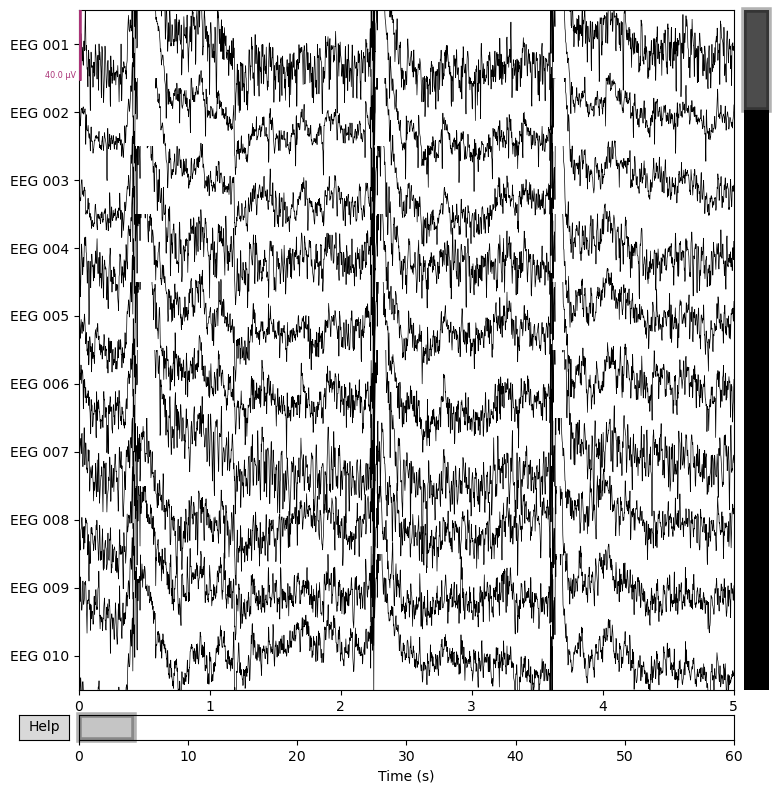

In [146]:
import mne

data_path = mne.datasets.sample.data_path()
raw = mne.io.read_raw_fif(str(data_path) + '/MEG/sample/sample_audvis_raw.fif', preload=True)

raw.pick_types(eeg=True, stim=True)
raw.crop(tmax=60) 

disp_raw = raw.plot(n_channels=10, duration=5)

## Simple preprocessing + feature extraction
- Epoching (data segmentation)
- Divde data based on event labels
- Visualize event-related potentials (ERPs)

In [175]:
dir(raw)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_data',
 '_dtype',
 '_dtype_',
 '_extra_attributes',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',


86 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
40 matching events found
Setting baseline interval to [-0.49948803289596966, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 40 events and 902 original time points ...
1 bad epochs dropped
<Epochs |  39 events (all good), -0.499488 – 1.00064 s, baseline -0.499488 – 0 s, ~21.2 MB, data loaded,
 'Auditory/Left': 20
 'Visual/Left': 19>


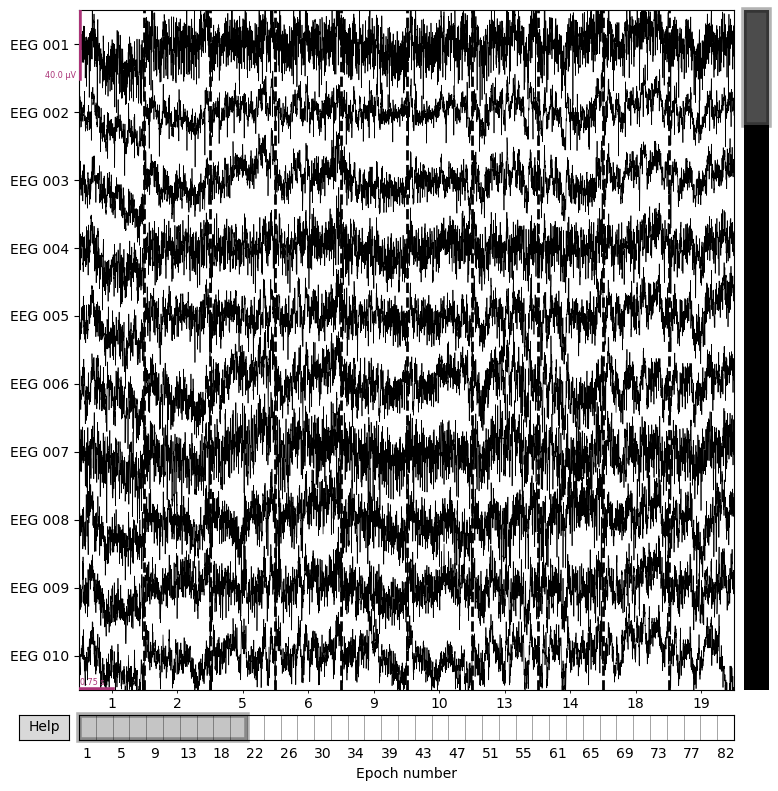

In [148]:
events = mne.find_events(raw, stim_channel='STI 014')
event_id = {'Auditory/Left': 1, 'Visual/Left': 3}
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.5, tmax=1.0, baseline=(None, 0), preload=True)

print(epochs)
disp_epochs = epochs.plot(n_epochs=10, n_channels=10)

In [ ]:
evoked_aud = epochs['Auditory/Left'].average()
evoked_vis = epochs['Visual/Left'].average()

# If you encounter an error, use the lateset version of matplotlib 
evoked_aud.plot()
evoked_vis.plot()

In [168]:
plt.close("all")

In [169]:
%matplotlib inline

Shape of the scaled data: (39, 61336)


C:\Users\kyungho\AppData\Local\Temp\ipykernel_21780\1043620959.py:6: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = epochs.get_data()  # shape: (n_trials, n_channels, n_times)


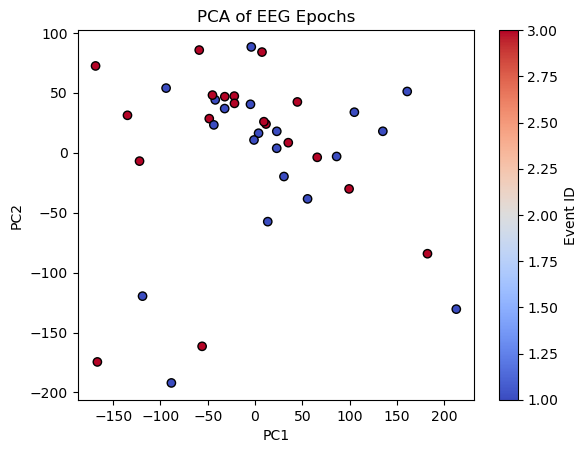

In [172]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 평균을 뺀 후 epochs 데이터 → (n_epochs, n_channels × n_times)
X = epochs.get_data()  # shape: (n_trials, n_channels, n_times)
X_flat = X.reshape(X.shape[0], -1)  # Flatten: 각 trial을 하나의 벡터로

# 표준화 + PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)

print('Shape of the scaled data:', X_scaled.shape)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 시각화
import matplotlib.pyplot as plt
labels = epochs.events[:, 2]
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='coolwarm', edgecolor='k')
plt.title("PCA of EEG Epochs")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.colorbar(label='Event ID')

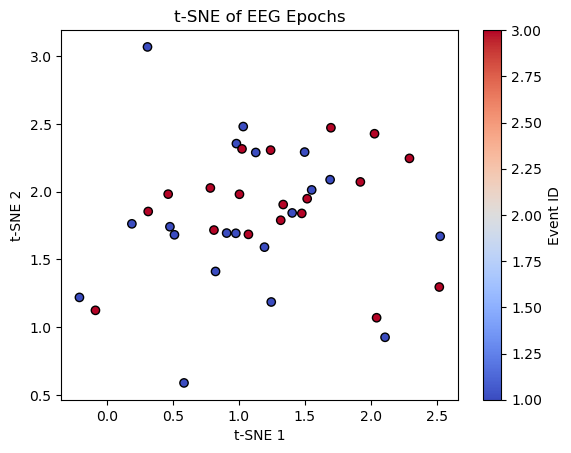

In [171]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='coolwarm', edgecolor='k')
plt.title("t-SNE of EEG Epochs")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.colorbar(label='Event ID')

In [ ]:
df = pd.read_csv('../data/train.csv')
print('The number of rows in the dataset:', df.shape[0])

print(df.head(10))

In [ ]:
plt.figure(figsize=(8,4)) # The data is balanced, so we can use accuracy_score metrics for our cross validation
sns.countplot(x='label', data=df)
plt.show()

In [ ]:
pixel_values = df.drop(columns=['label'])
targets = df['label']

In [ ]:
plt.figure(figsize=(14,12))
for i, (pixel, target) in enumerate(zip(pixel_values.values[:10], targets[:10])):
    plt.subplot(1, 10, i+1)
    img = pixel.reshape(28,28)
    plt.imshow(img, cmap='binary')
    plt.title(target, fontdict={'fontsize':15})
    plt.xticks([])
    plt.yticks([])

In [ ]:
tsne = TSNE(n_components=2, random_state=42, n_jobs=8)   # reducing the n_columns to 2
# for n_jobs, choose appropriate number based on your CPU cores
transformed_data = tsne.fit_transform(pixel_values.iloc[:10000, :])

In [ ]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:10000])),
                        columns=["X", "y", "targets"])
tsne_df.head(10) # Here we see there are only 2 columns in the transformed dataset

In [ ]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "X", "y").add_legend()
plt.title("CLustered data after t-SNE transformation")

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=20)  #Splitting into training and validation set

rfc = RandomForestClassifier(n_estimators=6)

rfc.fit(X_train, y_train)

pred = rfc.predict(X_val)
print(f'The accuracy on validation set is {accuracy_score(y_val, pred)}')

In [ ]:
X = tsne_df.drop('targets', axis=1)
y = tsne_df['targets']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=20)  #Splitting into training and validation set

In [ ]:
rfc = RandomForestClassifier(n_estimators=6)
rfc.fit(X_train, y_train)

In [ ]:
pred = rfc.predict(X_val)
print(f'The accuracy on validation set is {accuracy_score(y_val, pred)}')

In [ ]:
cm = confusion_matrix(y_val, pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp_cm.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
scores = cross_val_score(rfc, X, y, cv=5, verbose=1, n_jobs=-1)
print(f'The validation scores are {scores}')
print(f'The mean validation score is {scores.mean()}')